# `ultralytics` 快速上手

参考：[ultralytics](https://docs.ultralytics.com/)

In [1]:
from ultralytics import YOLO

# Create a new YOLO model from scratch
model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='coco128.yaml', epochs=3)

# Evaluate the model's performance on the validation set
results = model.val()

# Export the model to ONNX format
success = model.export(format='onnx')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [2]:
model.info()

Model summary (fused): 168 layers, 3151904 parameters, 0 gradients


(3151904, 0.0)

In [4]:
# Perform object detection on an image using the model
results = model('https://ultralytics.com/images/bus.jpg', conf=0.25, iou=0.7)
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs
    break

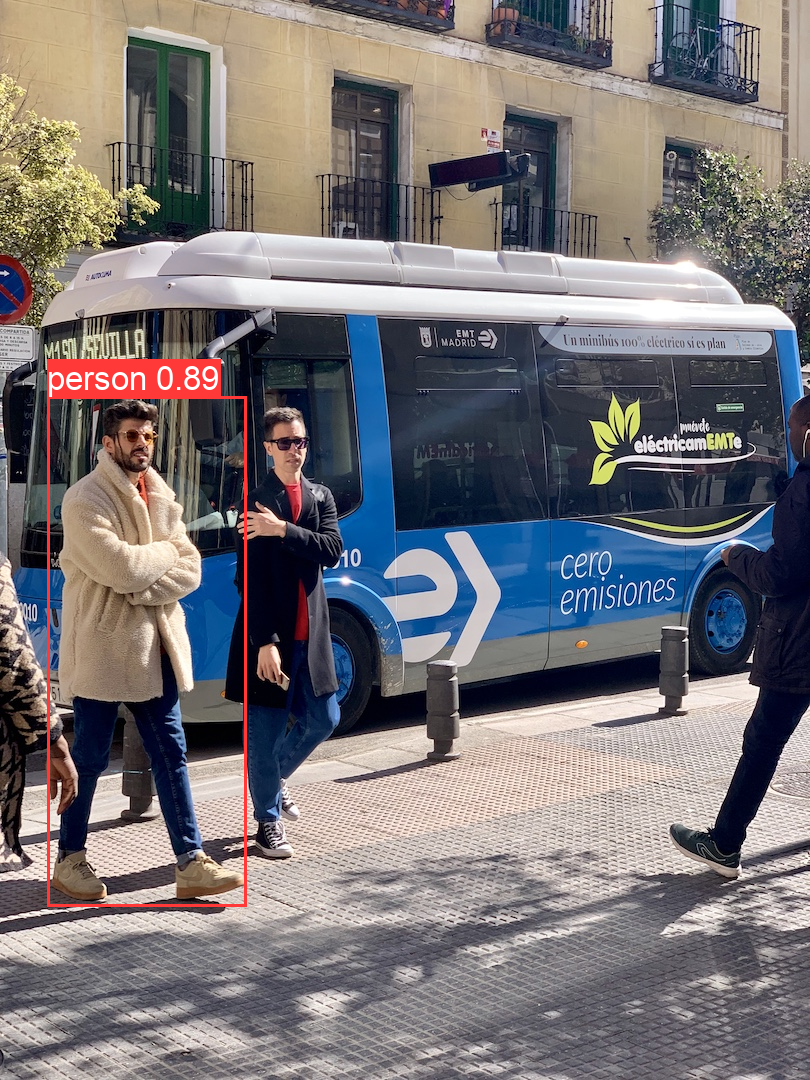

In [5]:
from PIL import Image

res_plotted = result[1].plot(pil=True)
Image.fromarray(res_plotted[:, :, ::-1])

In [6]:
result.boxes.cls

tensor([ 5.,  0.,  0.,  0.,  0., 11.], device='cuda:0')

In [7]:
result.boxes.conf

tensor([0.8897, 0.8854, 0.8676, 0.8225, 0.4323, 0.4203], device='cuda:0')

In [9]:
result.boxes.data

tensor([[2.2367e+01, 2.2733e+02, 8.0251e+02, 7.6018e+02, 8.8971e-01, 5.0000e+00],
        [4.7333e+01, 3.9677e+02, 2.4670e+02, 9.0620e+02, 8.8536e-01, 0.0000e+00],
        [6.7034e+02, 3.7896e+02, 8.1000e+02, 8.7867e+02, 8.6764e-01, 0.0000e+00],
        [2.2060e+02, 4.0592e+02, 3.4431e+02, 8.5884e+02, 8.2246e-01, 0.0000e+00],
        [0.0000e+00, 5.5279e+02, 6.4058e+01, 8.7603e+02, 4.3231e-01, 0.0000e+00],
        [1.9550e-02, 2.5435e+02, 3.2364e+01, 3.2485e+02, 4.2028e-01, 1.1000e+01]], device='cuda:0')